In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision',3) 

In [2]:
data=pd.read_csv(r'H:\阿里云\红酒数据集分析\winequality-red.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [3]:
data.to_csv(r'H:\阿里云\红酒数据集分析\winequality-red2.csv')

In [4]:
data.to_excel(r'H:\阿里云\红酒数据集分析\winequality-red3.xlsx')

In [5]:
#查看数据集的数据类型和空值情况等
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#简单的数据统计
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [13]:
# 获取所有的自带样式
plt.style.available
# 使用自带的样式进行美化
plt.style.use('ggplot')


Figure 1: Univariate Boxplots


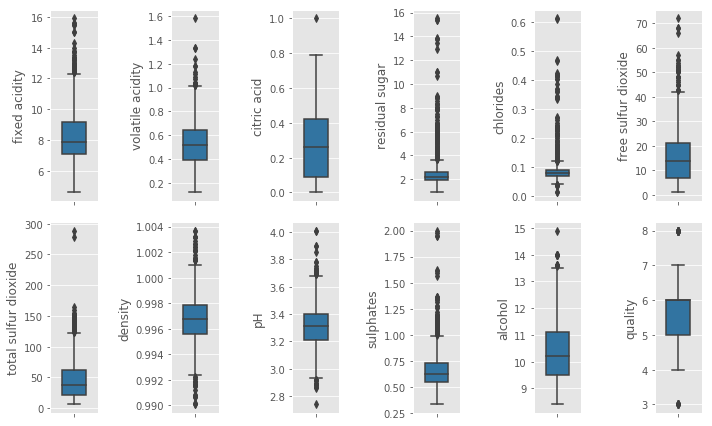

In [14]:
#获取所有列索引，并且转化成列表格式
colnm = data.columns.tolist()
fig = plt.figure(figsize = (10, 6))

for i in range(12):
    #绘制成2行6列的图
    plt.subplot(2,6,i+1)
    sns.boxplot(data[colnm[i]], orient="v", width = 0.5, color = color[0])
    plt.ylabel(colnm[i],fontsize = 12)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)

plt.tight_layout()
print('\nFigure 1: Univariate Boxplots')


Figure 2: Univariate Histograms


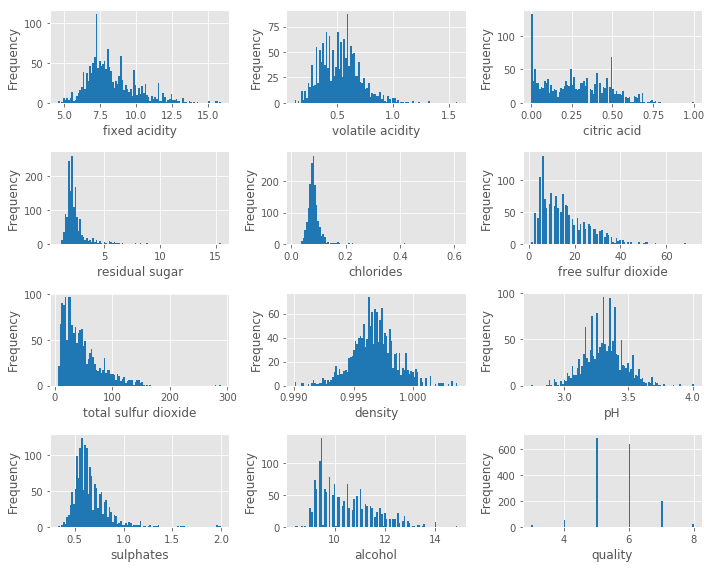

In [17]:
colnm = data.columns.tolist()
plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    #data.hist绘制直方图
    data[colnm[i]].hist(bins = 100, color = color[0])
    plt.xlabel(colnm[i],fontsize = 12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

In [ ]:
品质
这个数据集的目的是研究红酒品质和理化性质之间的关系，品质的评价范围是0-10，这个数据集中的范围是3到8，有82%的红酒品质是5或6

In [ ]:
酸度相关的特征
这个数据集有7个酸度相关的特征:fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。
    前6个特征都与红酒的pH的相关。pH是在对数的尺度，下面对前6个特征取对数然后作histogram。另外，pH值主要是与fixed acidity有关
    fixed acidity比volatile acidity和citric acid高1到2个数量级(Figure 4)，比free sulfur dioxide, total sulfur dioxide,
    sulphates高3个数量级。一个新特征total acid来自于前三个特征的和


Figure 3: Acidity Features in log10 Scale


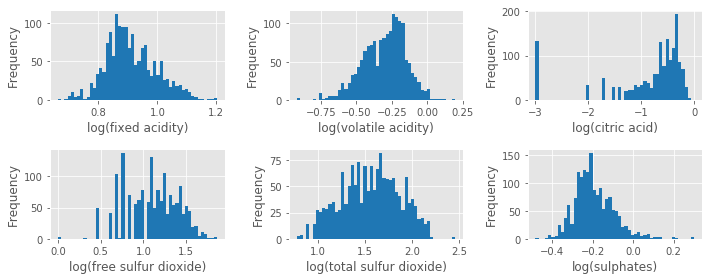

In [19]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

plt.figure(figsize = (10, 4))

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    #np.log10是以10为底数，clip函数：限制一个array的上下界
    v = np.log10(np.clip(data[acidityFeat[i]].values, a_min = 0.001, a_max = None))
    plt.hist(v, bins = 50, color = color[0])
    plt.xlabel('log(' + acidityFeat[i] + ')',fontsize = 12)

    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale')
#     numpy.clip(a, a_min, a_max, out=None)
# a : array
# a_min : 要限定范围的最小值
# a_max : 要限定范围的最大值
# out : 要输出的array，默认值为None，也可以是原array

In [21]:
import numpy as np
np.log10(100)

2.0

In [46]:
a = np.arange(10)
np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [47]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
np.clip(a, 3, 7, out=a)

array([3, 3, 3, 3, 4, 5, 6, 7, 7, 7])

In [50]:
np.clip(a, 3, 6,out=a)

array([3, 3, 3, 3, 4, 5, 6, 6, 6, 6])

In [34]:
 a = np.arange(10)

In [35]:
 np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8)

array([3, 4, 2, 3, 4, 5, 6, 7, 8, 8])

In [ ]:
numpy.clip(a, a_min, a_max, out=None)
a : array
a_min : 要限定范围的最小值
a_max : 要限定范围的最大值
out : 要输出的array，默认值为None，也可以是原array
给定一个范围[min, max]，数组中值不在这个范围内的，会被限定为这个范围的边界。如给定范围[0, 1]，数组中元素值
小于0的，值会变为0，数组中元素值大于1的，要被更改为1.

Figure 4


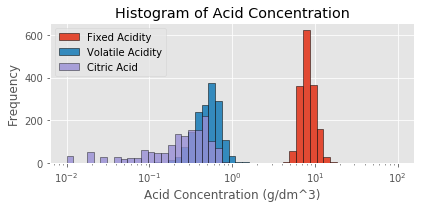

In [56]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2, 2))
plt.hist(data['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')
plt.hist(data['volatile acidity'], bins = bins, edgecolor = 'k', label = 'Volatile Acidity')
plt.hist(data['citric acid'], bins = bins, edgecolor = 'k', alpha = 0.8, label = 'Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4')

In [57]:
# 总酸度
data['total acid'] = data['fixed acidity'] + data['volatile acidity'] + data['citric acid']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acid
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,8.60
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,12.04
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,8.10


Figure 5: Total Acid Histogram


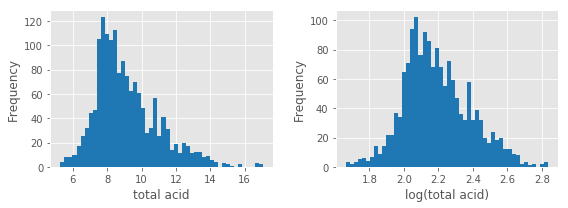

In [58]:
plt.figure(figsize = (8,3))

plt.subplot(121)
plt.hist(data['total acid'], bins = 50, color = color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(data['total acid']), bins = 50 , color = color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram")

In [ ]:
甜度(sweetness)
Residual sugar 与酒的甜度相关，通常用来区别各种红酒，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45g/L)。
这个数据中，主要为干红，没有甜葡萄酒

In [62]:
# Residual sugar
data['sweetness'] = pd.cut(data['residual sugar'], bins = [0, 4, 12, 45], labels=["dry", "medium dry", "semi-sweet"])

In [65]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acid,sweetness
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,8.100,dry
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5,8.680,dry
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,8.600,dry
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,12.040,dry
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5,8.100,dry
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.998,3.51,0.56,9.4,5,8.060,dry
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.996,3.30,0.46,9.4,5,8.560,dry
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.995,3.39,0.47,10.0,7,7.950,dry
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.997,3.36,0.57,9.5,7,8.400,dry
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.998,3.35,0.80,10.5,5,8.360,medium dry


Figure 6: Sweetness


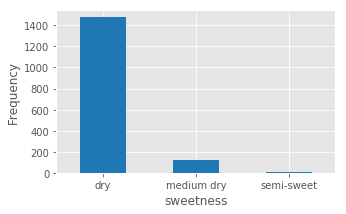

In [70]:
plt.figure(figsize = (5,3))
data['sweetness'].value_counts().plot(kind = 'bar', color = color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()#自动调整子图参数，使之填充整个图像区域
print("Figure 6: Sweetness")


Figure 7: Physicochemical Properties and Wine Quality by Boxplot


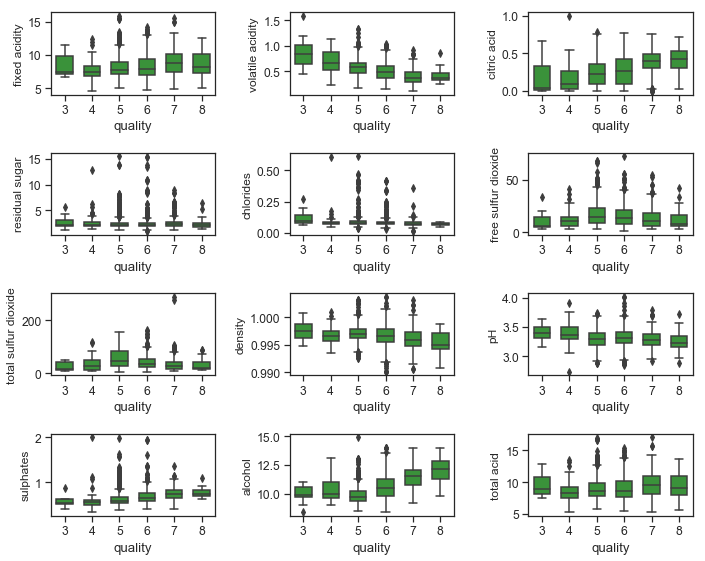

In [73]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.1)

colnm = data.columns.tolist()[:11] + ['total acid']
plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = colnm[i], data = data, color = color[2], width = 0.6)    
    plt.ylabel(colnm[i],fontsize = 12)
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot")


Figure 8: Pairwise Correlation Plot


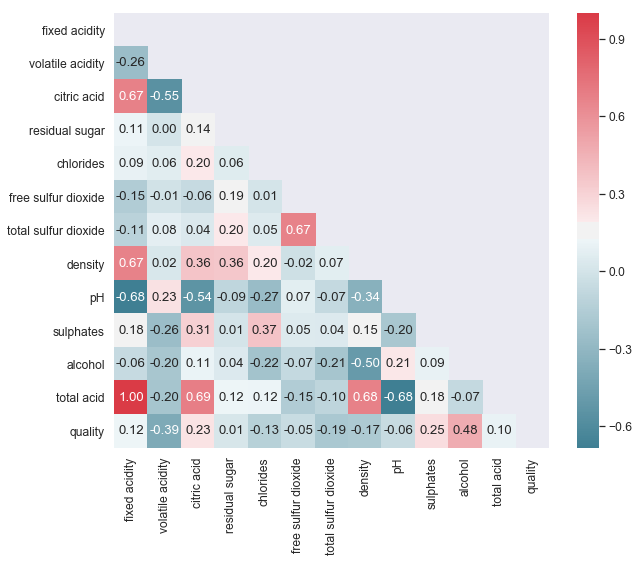

In [74]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = data.columns.tolist()[:11] + ['total acid', 'quality']
mcorr = data[colnm].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot")    


Figure 9: Density vs Alcohol


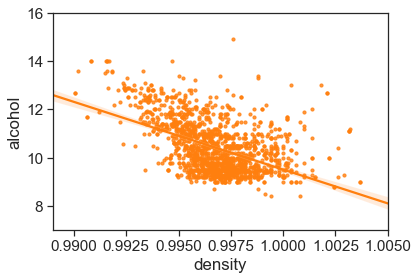

In [76]:
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

# plot figure
plt.figure(figsize = (6,4))
sns.regplot(x='density', y = 'alcohol', data = data, scatter_kws = {'s':10}, color = color[1])
plt.xlim(0.989, 1.005)
plt.ylim(7,16)
print('Figure 9: Density vs Alcohol')

Figure 10: pH vs acid


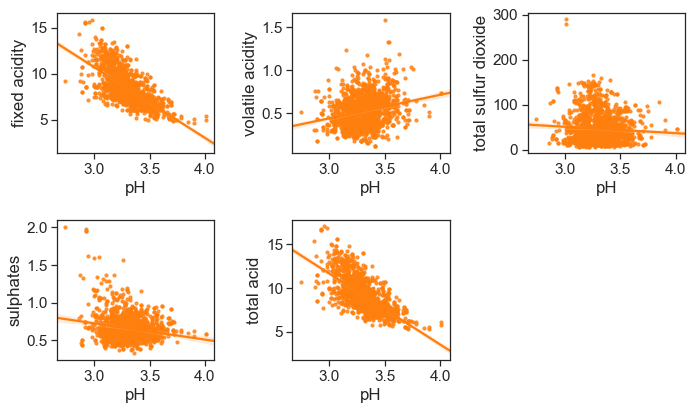

In [77]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = data, scatter_kws = {'s':10}, color = color[1])
plt.tight_layout()
print("Figure 10: pH vs acid")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality


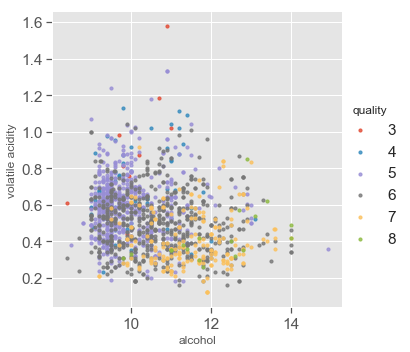

In [78]:
plt.style.use('ggplot')

sns.lmplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', 
           data = data, fit_reg = False, scatter_kws={'s':10}, size = 5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


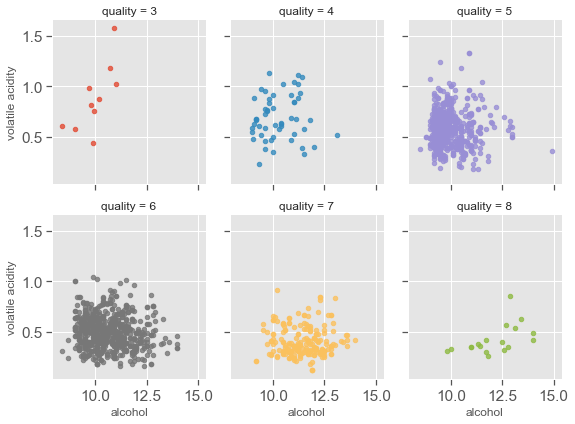

In [79]:

sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = data,fit_reg = False, size = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")

Figure 12: pH with Fixed Acidity and Citric Acid


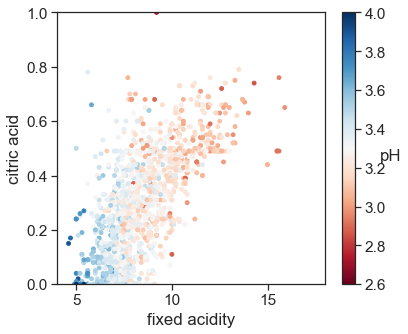

In [80]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(data['fixed acidity'], data['citric acid'], c=data['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')